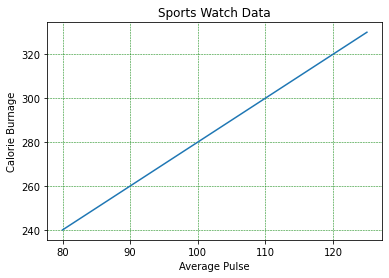

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([80, 85, 90, 95, 100, 105, 110, 115, 120, 125])
y = np.array([240, 250, 260, 270, 280, 290, 300, 310, 320, 330])

plt.title("Sports Watch Data")
plt.xlabel("Average Pulse")
plt.ylabel("Calorie Burnage")

plt.plot(x, y)

plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.show()

In [2]:
#Libraries needed to run the tool
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

In [3]:
# Define datasets for q
df1 = pd.read_csv('/home/ramesh/smd/smd.traj/syt1.smd/q_parameter/data/q.syt1.c2a.10A.sim1.csv', delim_whitespace=True, names= ["t", "q"])
df2 = pd.read_csv('/home/ramesh/smd/smd.traj/syt1.smd/q_parameter/data/q.syt1.c2b.10A.sim1.csv', delim_whitespace=True, names= ["t", "q"])
# Define datasets for Calcium coordination
df1c2a = pd.read_csv('/home/ramesh/smd/smd.traj/syt1.smd/ca.coordination.count/data/c2a.10A.sim1.dat', delim_whitespace=True, names=["t","ca1","ca2","ca3"])
df2c2b = pd.read_csv('/home/ramesh/smd/smd.traj/syt1.smd/ca.coordination.count/data/c2b.10A.sim1.dat', delim_whitespace=True, names=["t","ca1","ca2"])

df1c2a['avg'] = (df1c2a['ca1']+df1c2a['ca2']+df1c2a['ca3'])/3
df2c2b['avg'] = (df2c2b['ca1']+df2c2b['ca2'])/2

In [4]:
df1

,t,q
0,0,0.999999
1,1,0.999339
2,2,0.998327
3,3,0.993705
4,4,0.998107
...,...,...
1065,1065,0.025904
1066,1066,0.022366
1067,1067,0.023086
1068,1068,0.023668


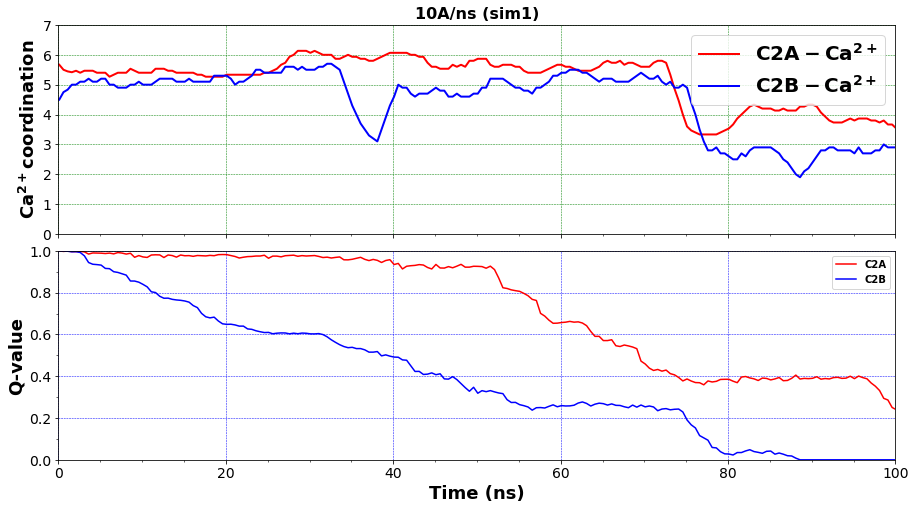

In [13]:
legend_properties = {'weight':'bold'}
fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,8), sharex=True, num=12592)
fig1.subplots_adjust(hspace=0.08, wspace = 1)
#fig1.subplots_adjust(hspace=0.025, wspace = 0)
# Create every 5 interval
n= 5
ax1.set_title('10A/ns (sim1)', weight='bold', fontsize=16)
# Create Q data
t = df1c2a['t'][::n]/10
y1 = df1['q'][::n]
y2 = df2['q'][::n]
ax2.set_xlabel('Time (ns)', fontsize=18, fontweight='bold')
ax2.set_ylabel('Q-value', fontdict={'fontsize':18}, fontweight='bold')
ax2.plot(t, y1, label='C2A', color='red')
ax2.plot(t, y2, label='C2B', color='blue')
ax2.tick_params(axis='y')
ax2.legend(loc='best', prop=legend_properties)

# Create Calcium for C2A
y3 = df1c2a['ca1'][::n]
y4 = df1c2a['ca2'][::n]
y5 = df1c2a['ca3'][::n]
c2a_avg = df1c2a['avg'][::n]
cona = c2a_avg.rolling(5, min_periods=1).mean()

ax1.set_ylabel(r'$\mathbf{{Ca^{2+}}coordination}$', fontdict={'fontsize':18})
# Create Calcium for C2B
y6 = df2c2b['ca1'][::n]
y7 = df2c2b['ca2'][::n]
c2b_avg = df2c2b['avg'][::n]
conb = c2b_avg.rolling(5, min_periods=1).mean()

color = 'tab:red'
#ax1.plot(t, y6, label='Ca1')
#ax1.plot(t, y7, label='Ca2')
ax1.plot(t, cona, label=r'$\mathbf{C2A-{Ca^{2+}}}$', color='red', linewidth=2)
ax1.plot(t, conb, label=r'$\mathbf{C2B-{Ca^{2+}}}$', color='blue', linewidth=2)
#ax1.legend(loc='best',fontsize=20)
ax1.legend(loc='upper right', fontsize=20)

############################################################
# set specify ticks label size for ax3
ax2.tick_params(axis ='both', which= 'major', labelsize=14)
ax2.tick_params(axis ='both', which= 'major', labelsize=14)
ax2.tick_params(axis ='both', which= 'minor', labelsize=14)
ax2.tick_params(axis ='both', which= 'minor', labelsize=14)
#ax2.tick_params(axis='y', which='minor', length=8, width=2)
ax2.tick_params(axis='both', which= 'major', bottom = 'bool', labelsize=14 )
ax2.tick_params(axis='both', which= 'minor', bottom = 'bool', labelsize=14 )
ax2.set_xlim([0, 100])
ax2.set_xticks(np.arange(0, 100.5, 20))
ax2.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax2.set_ylim([0, 1.001])
ax2.set_yticks(np.arange(0, 1.001, 0.2))
ax2.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
##################################################################
ax1.tick_params(axis='both', which= 'major', bottom = 'bool',labelsize=14 )
ax1.tick_params(axis='both', which= 'minor', bottom = 'bool', labelsize=14 )
ax1.set_xlim([0, 100])
ax1.set_xticks(np.arange(0, 100.5, 20))
ax1.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax1.set_ylim([0, 7.001])
ax1.set_yticks(np.arange(0, 7.001, 1))
#####################################################################
ax1.grid(color = 'green', linestyle = '--', linewidth = 0.5)
ax2.grid(color = 'blue', linestyle = '--', linewidth = 0.5)
#fig1.savefig('plot/Q.C2A.C2B.cal.combine.10A.sim1.png', bbox_inches='tight', dpi=600)